# DAB322-23F-002 -- Capstone

### Weather EDA

Group information:
 - Group Number: 4
 - Group Members
     - Sumanth Donthula (0827877)
     - Manish Kumar Meerjumla (0827894)
     - Praveena Gajula (0828970)
     - Kavya Naga Sri Chennamsetti (0823008)
     - Jonathan Chukwuma Oteh (0775057)

## Import Libraries

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [31]:
import warnings
warnings.filterwarnings("ignore")

## Overview of the data

In [32]:
df = pd.read_csv('weather_data_3_crops.csv')

In [33]:
df.head()

,STATION,STATION NAME,ST,STATE,REGION,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS
0,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2010-03-29 00:00:00.000,NaN,NaN,NaN,51.0,58.0,46.0,NaN
1,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2015-01-13 00:00:00.000,NaN,NaN,NaN,51.0,58.0,46.0,NaN
2,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2017-05-16 00:00:00.000,NaN,NaN,NaN,51.0,58.0,46.0,NaN
3,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2019-12-03 00:00:00.000,NaN,NaN,NaN,51.0,58.0,46.0,NaN
4,USR0000CKON,KONOCTI CALIFORNIA,CA,CALIFORNIA,West,38.9119,-122.7064,659.3,2009-10-19 00:00:00.000,NaN,NaN,NaN,51.0,58.0,46.0,NaN


In [34]:
df.shape

(3024869, 16)

In [35]:
df.dtypes

STATION          object
STATION NAME     object
ST               object
STATE            object
REGION           object
LATITUDE        float64
LONGITUDE       float64
ELEVATION       float64
DATE             object
PRCP            float64
SNOW            float64
SNWD            float64
TAVG            float64
TMAX            float64
TMIN            float64
TOBS            float64
dtype: object

In [36]:
#checking the number of unique values in each column
df.nunique()

STATION          592
STATION NAME     591
ST                17
STATE             17
REGION             4
LATITUDE         592
LONGITUDE        589
ELEVATION        481
DATE            5479
PRCP             686
SNOW             207
SNWD              58
TAVG             207
TMAX             213
TMIN             208
TOBS             149
dtype: int64

In [37]:
#Calculating the number of duplicate rows
df.duplicated().sum()

0

## Handle Missing Values

In [38]:
df.isnull().sum()

STATION               0
STATION NAME          0
ST                    0
STATE                 0
REGION                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
DATE                  0
PRCP            1638301
SNOW            1902257
SNWD            1915860
TAVG            1405616
TMAX              56328
TMIN              57122
TOBS            1692179
dtype: int64

In [39]:
# Convert 'DATE' to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

In [40]:
# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['PRCP'] = df.groupby(['STATION NAME', df['DATE'].dt.year, df['DATE'].dt.month])['PRCP'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, then fill missing values with the average
df['PRCP'] = df.groupby(['STATION NAME', df['DATE'].dt.year])['PRCP'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['PRCP'] = df.groupby(['STATION NAME'])['PRCP'].transform(lambda x: x.fillna(x.mean()))

# Fill remaining missing values in 'PRCP' with the Zero
df['PRCP'].fillna(0, inplace=True)

# Verify that the null values are filled
print(df.isnull().sum())


STATION               0
STATION NAME          0
ST                    0
STATE                 0
REGION                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
DATE                  0
PRCP                  0
SNOW            1902257
SNWD            1915860
TAVG            1405616
TMAX              56328
TMIN              57122
TOBS            1692179
dtype: int64


In [41]:
# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['SNOW'] = df.groupby(['STATION NAME', df['DATE'].dt.year, df['DATE'].dt.month])['SNOW'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, then fill missing values with the average
df['SNOW'] = df.groupby(['STATION NAME', df['DATE'].dt.year])['SNOW'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['SNOW'] = df.groupby(['STATION NAME'])['SNOW'].transform(lambda x: x.fillna(x.mean()))

# Fill remaining missing values in 'SNOW' with the Zero
df['SNOW'].fillna(0, inplace=True)


In [42]:
# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['SNWD'] = df.groupby(['STATION NAME', df['DATE'].dt.year, df['DATE'].dt.month])['SNWD'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, then fill missing values with the average
df['SNWD'] = df.groupby(['STATION NAME', df['DATE'].dt.year])['SNWD'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['SNWD'] = df.groupby(['STATION NAME'])['SNWD'].transform(lambda x: x.fillna(x.mean()))

# Fill remaining missing values in 'SNWD' with the Zero
df['SNWD'].fillna(0, inplace=True)


In [43]:
# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['TMAX'] = df.groupby(['STATION NAME', df['DATE'].dt.year, df['DATE'].dt.month])['TMAX'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, then fill missing values with the average
df['TMAX'] = df.groupby(['STATION NAME', df['DATE'].dt.year])['TMAX'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['TMAX'] = df.groupby(['STATION NAME'])['TMAX'].transform(lambda x: x.fillna(x.mean()))

# Fill missing values in 'TMAX' with the overall mean
df['TMAX'].fillna(df['TMAX'].mean(), inplace=True)


In [44]:
# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['TMIN'] = df.groupby(['STATION NAME', df['DATE'].dt.year, df['DATE'].dt.month])['TMIN'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, then fill missing values with the average
df['TMIN'] = df.groupby(['STATION NAME', df['DATE'].dt.year])['TMIN'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['TMIN'] = df.groupby(['STATION NAME'])['TMIN'].transform(lambda x: x.fillna(x.mean()))

# Fill missing values in 'TMIN' with the overall mean
df['TMIN'].fillna(df['TMIN'].mean(), inplace=True)


In [45]:
# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['TOBS'] = df.groupby(['STATION NAME', df['DATE'].dt.year, df['DATE'].dt.month])['TOBS'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, then fill missing values with the average
df['TOBS'] = df.groupby(['STATION NAME', df['DATE'].dt.year])['TOBS'].transform(lambda x: x.fillna(x.mean()))

# Group by 'STATION NAME', year, and month, then fill missing values with the average
df['TOBS'] = df.groupby(['STATION NAME'])['TOBS'].transform(lambda x: x.fillna(x.mean()))

# Fill missing values in 'PRCP' with the overall mean
df['TOBS'].fillna(df['TOBS'].mean(), inplace=True)


In [46]:
# Fill missing values in 'TAVG' with the average of 'TMAX' and 'TMIN' on the same row
df['TAVG'].fillna((df['TMAX'] + df['TMIN']) / 2, inplace=True)

In [47]:
# Verify that the null values are filled
print(df.isnull().sum())

STATION         0
STATION NAME    0
ST              0
STATE           0
REGION          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
DATE            0
PRCP            0
SNOW            0
SNWD            0
TAVG            0
TMAX            0
TMIN            0
TOBS            0
dtype: int64


In [48]:
df.head()

,STATION,STATION NAME,ST,STATE,REGION,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS
0,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2010-03-29,0.0,0.0,0.0,51.0,58.0,46.0,48.447781
1,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2015-01-13,0.0,0.0,0.0,51.0,58.0,46.0,48.447781
2,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2017-05-16,0.0,0.0,0.0,51.0,58.0,46.0,48.447781
3,USR0000CCOU,CO LINE CALIFORNIA,CA,CALIFORNIA,West,39.0189,-122.4119,635.5,2019-12-03,0.0,0.0,0.0,51.0,58.0,46.0,48.447781
4,USR0000CKON,KONOCTI CALIFORNIA,CA,CALIFORNIA,West,38.9119,-122.7064,659.3,2009-10-19,0.0,0.0,0.0,51.0,58.0,46.0,48.447781


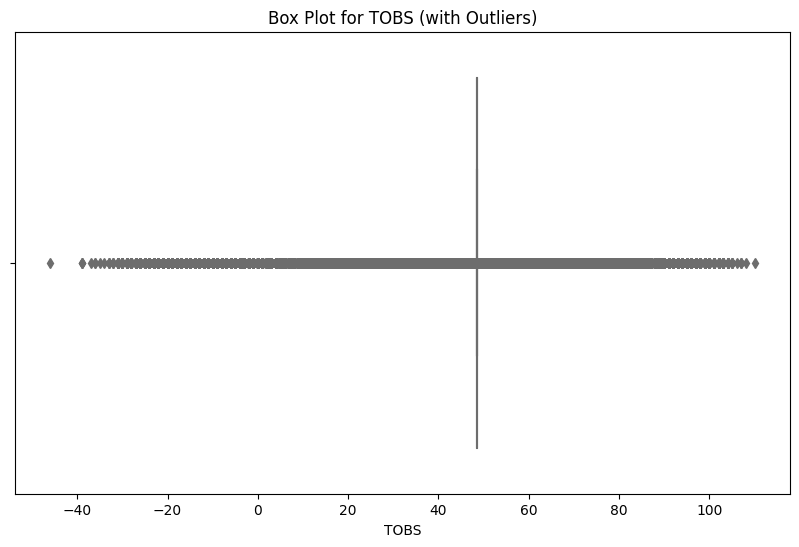

Number of outliers in TOBS: 1405481


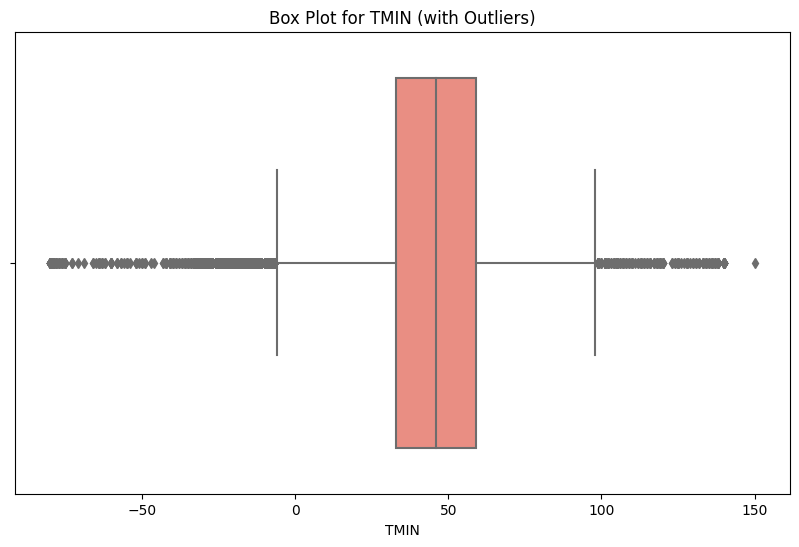

Number of outliers in TMIN: 16146


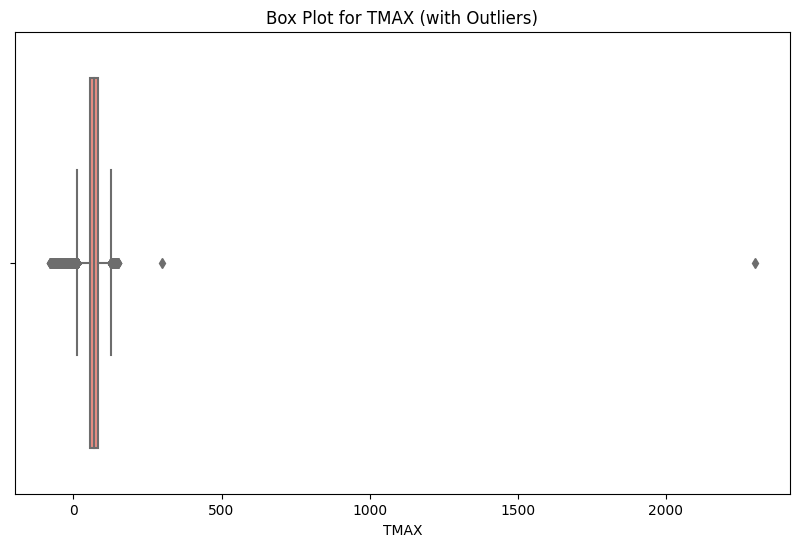

Number of outliers in TMAX: 12903


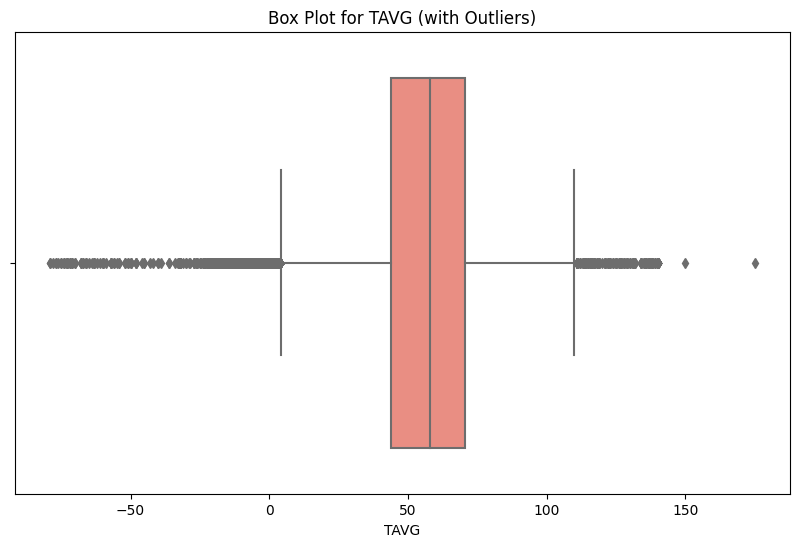

Number of outliers in TAVG: 15114


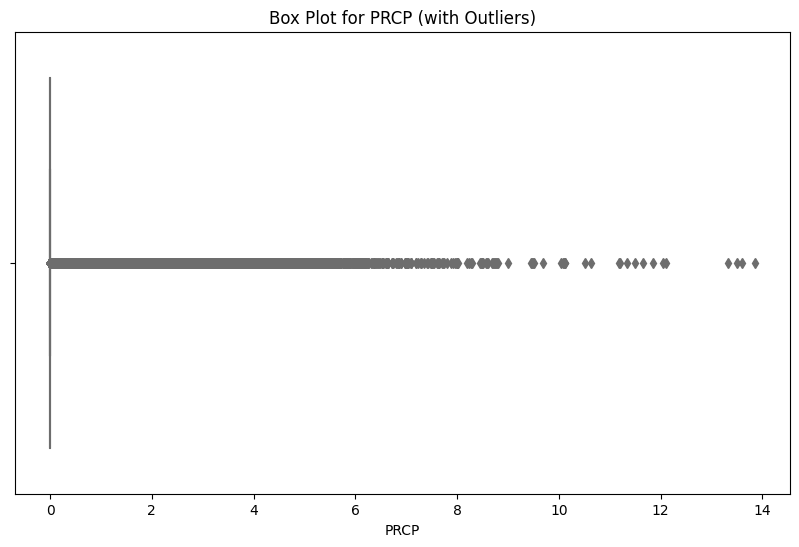

Number of outliers in PRCP: 466887


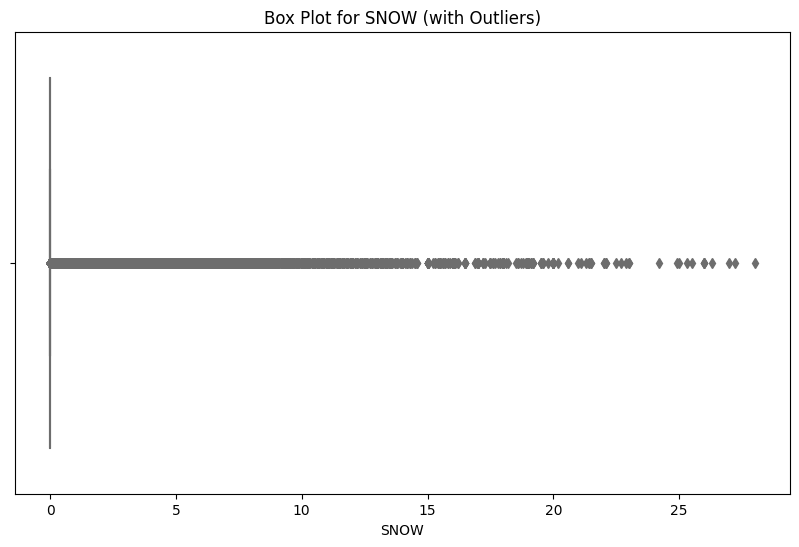

Number of outliers in SNOW: 191721


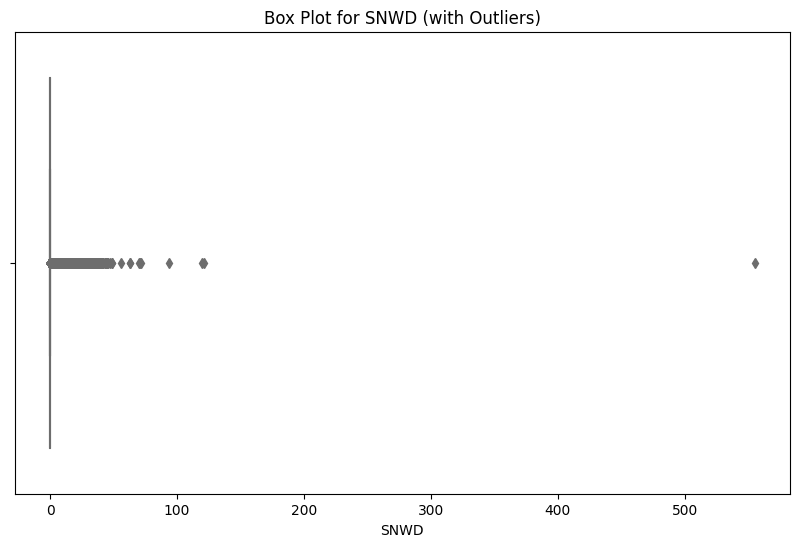

Number of outliers in SNWD: 262341

Outlier Information:
{'TOBS': {'lower_bound': 48.44778096544164, 'upper_bound': 48.44778096544164, 'outliers_count': 1405481}, 'TMIN': {'lower_bound': -6.0, 'upper_bound': 98.0, 'outliers_count': 16146}, 'TMAX': {'lower_bound': 13.0, 'upper_bound': 125.0, 'outliers_count': 12903}, 'TAVG': {'lower_bound': 4.25, 'upper_bound': 110.25, 'outliers_count': 15114}, 'PRCP': {'lower_bound': 0.0, 'upper_bound': 0.0, 'outliers_count': 466887}, 'SNOW': {'lower_bound': 0.0, 'upper_bound': 0.0, 'outliers_count': 191721}, 'SNWD': {'lower_bound': 0.0, 'upper_bound': 0.0, 'outliers_count': 262341}}


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of weather variables
weather_variables = ['TOBS', 'TMIN', 'TMAX', 'TAVG', 'PRCP', 'SNOW', 'SNWD']

# Dictionary to store outlier information for each weather variable
outlier_info = {}

# Analyze outliers for each weather variable
for variable in weather_variables:
    # Calculate quartiles and IQR for the variable
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and filter outliers
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]

    # Create a box plot to visualize outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[variable], color='salmon')
    plt.title(f"Box Plot for {variable} (with Outliers)")
    plt.show()

    # Count the number of outliers
    outliers_count = outliers.shape[0]
    print(f"Number of outliers in {variable}: {outliers_count}")

    # Store outlier information in the dictionary
    outlier_info[variable] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': outliers_count
    }

# Display the dictionary with outlier information
print("\nOutlier Information:")
print(outlier_info)


In [50]:
# Remove rows where TMAX > 135
df = df[df['TMAX'] <= 135]

# Remove rows where TMIN < -80
df = df[df['TMIN'] >= -80]

# Remove rows where SNWD > 200
df = df[df['SNWD'] <= 200]


## Univariate Analysis

In [51]:
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS
count,3.024694e+06,3.024694e+06,3.024694e+06,3024694,3.024694e+06,3.024694e+06,3.024694e+06,3.024694e+06,3.024694e+06,3.024694e+06,3.024694e+06
mean,3.719929e+01,-1.029637e+02,6.698894e+02,2015-06-01 05:19:43.426026240,5.686195e-02,6.710039e-02,3.200354e-01,5.623076e+01,6.785015e+01,4.541997e+01,4.844779e+01
min,1.931750e+01,-1.597153e+02,0.000000e+00,2008-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,-7.900000e+01,-7.900000e+01,-8.000000e+01,-4.600000e+01
25%,3.446190e+01,-1.192892e+02,1.926000e+02,2011-09-30 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01,5.500000e+01,3.300000e+01,4.844778e+01
50%,3.784310e+01,-9.972300e+01,3.773000e+02,2015-06-02 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,5.800000e+01,7.000000e+01,4.600000e+01,4.844778e+01
75%,4.054917e+01,-8.837860e+01,1.066800e+03,2019-01-16 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,7.050000e+01,8.300000e+01,5.900000e+01,4.844778e+01
max,4.646560e+01,-7.083710e+01,2.902000e+03,2022-12-31 00:00:00,1.385000e+01,2.800000e+01,1.210000e+02,1.340000e+02,1.350000e+02,1.340000e+02,1.100000e+02
std,4.967493e+00,1.882930e+01,6.563653e+02,NaN,2.491764e-01,4.602267e-01,1.724054e+00,1.787383e+01,1.930784e+01,1.751393e+01,1.315245e+01


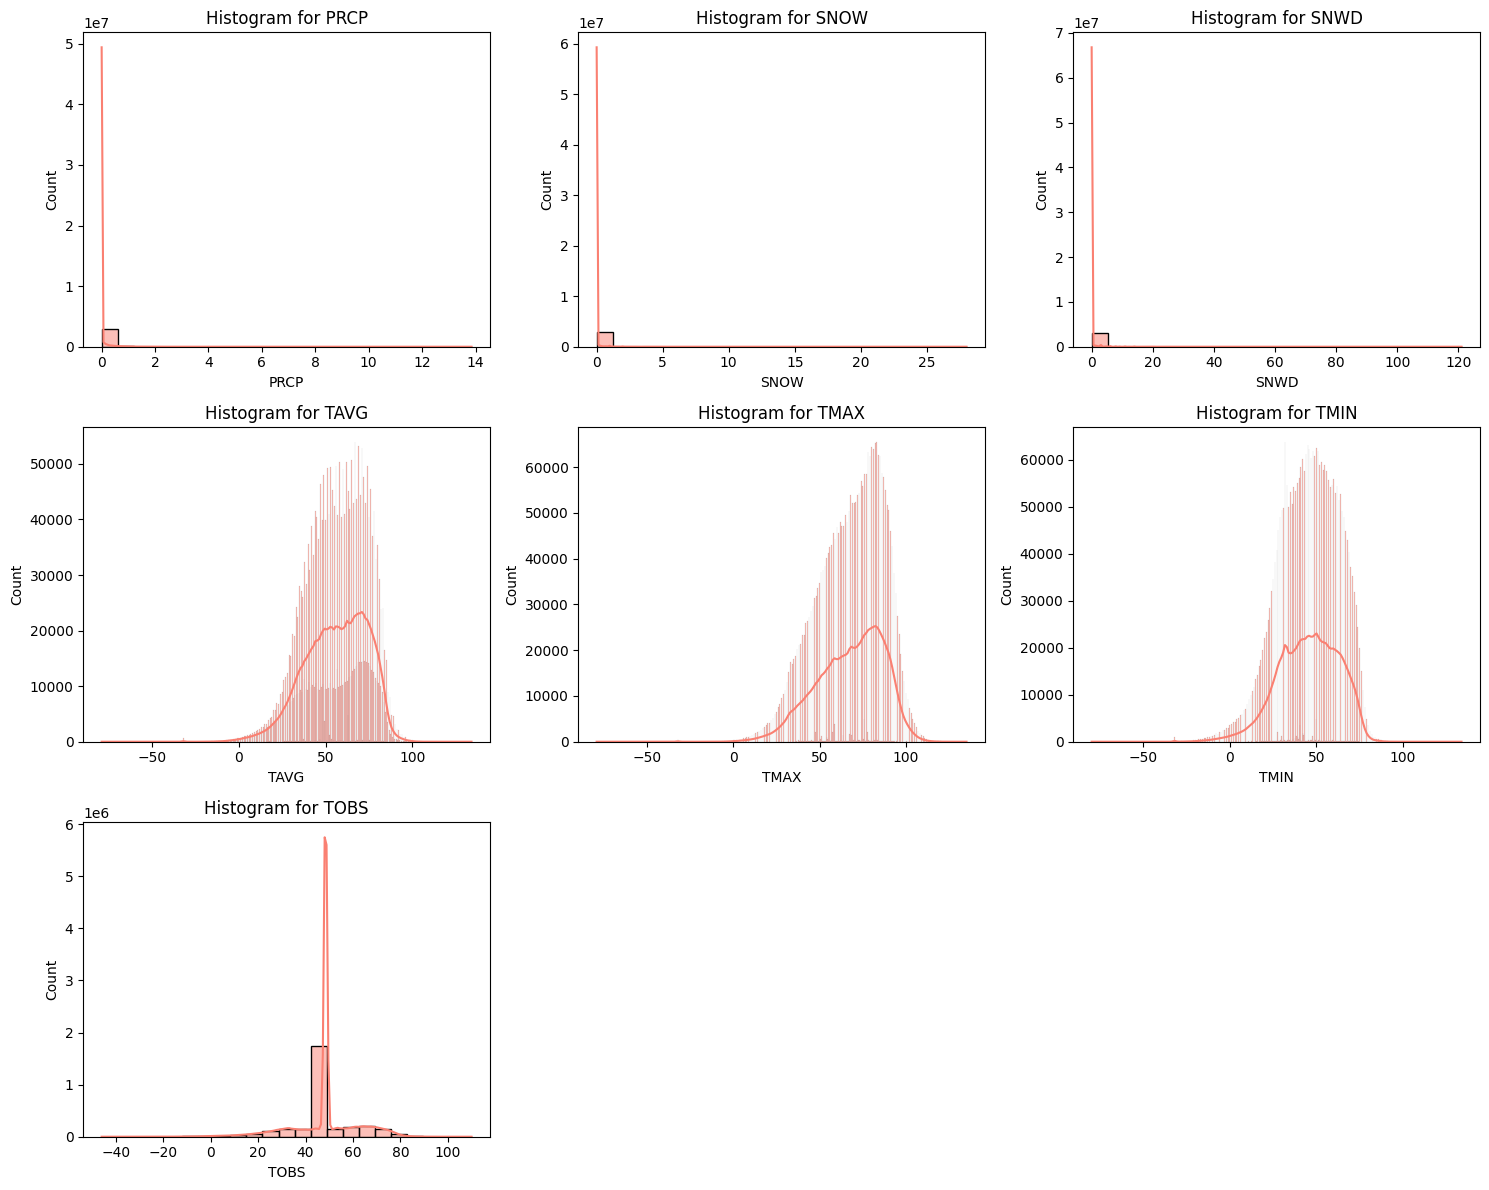

In [52]:
# Histograms for numerical variables
numerical_columns = ['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS']
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='salmon')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Bivariate analysis

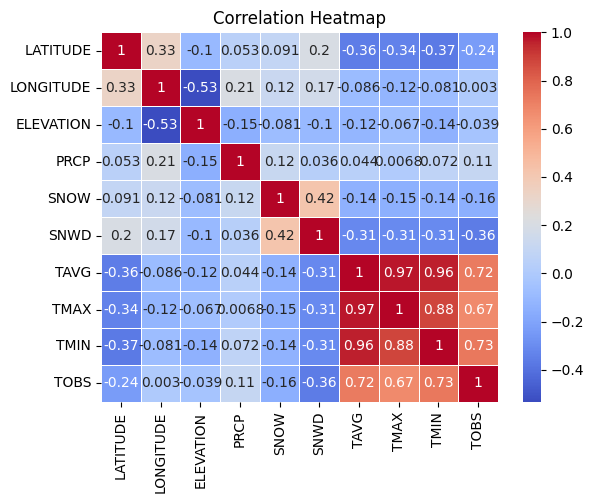

In [53]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a new DataFrame with only numerical columns
df_numerical = df[numerical_columns]

# Correlation heatmap
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()



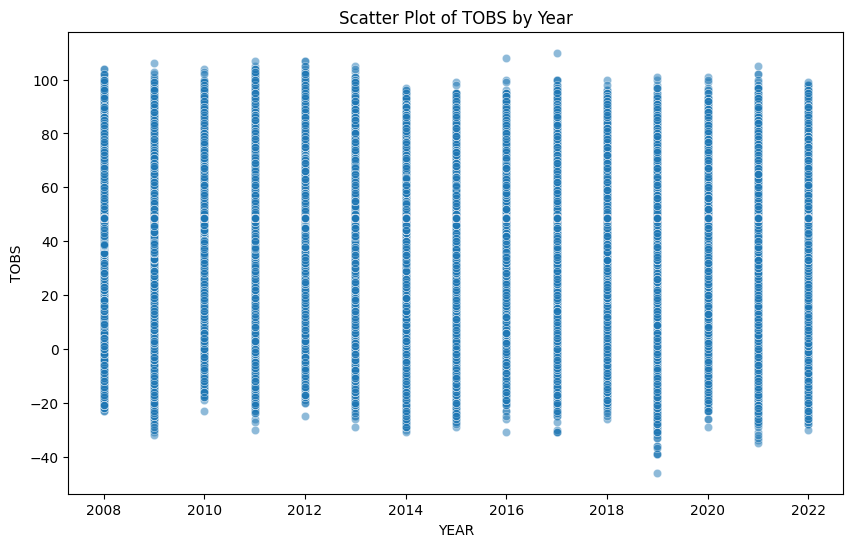

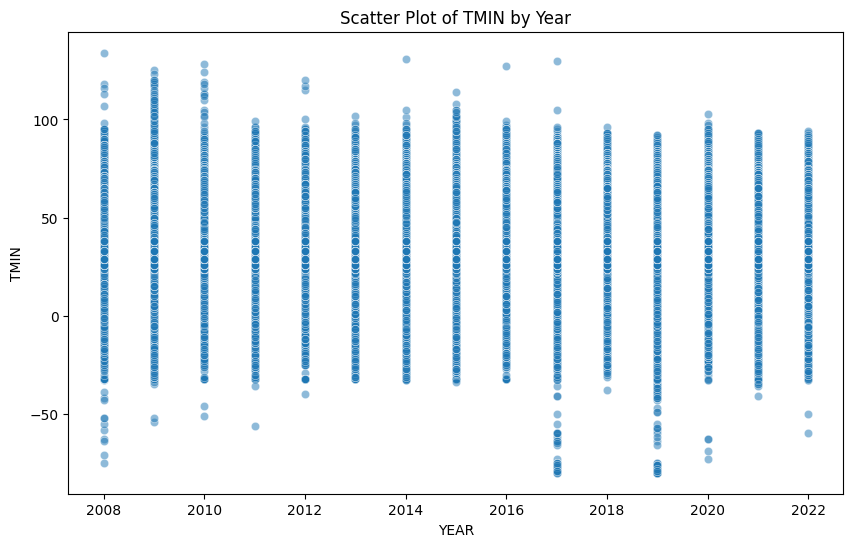

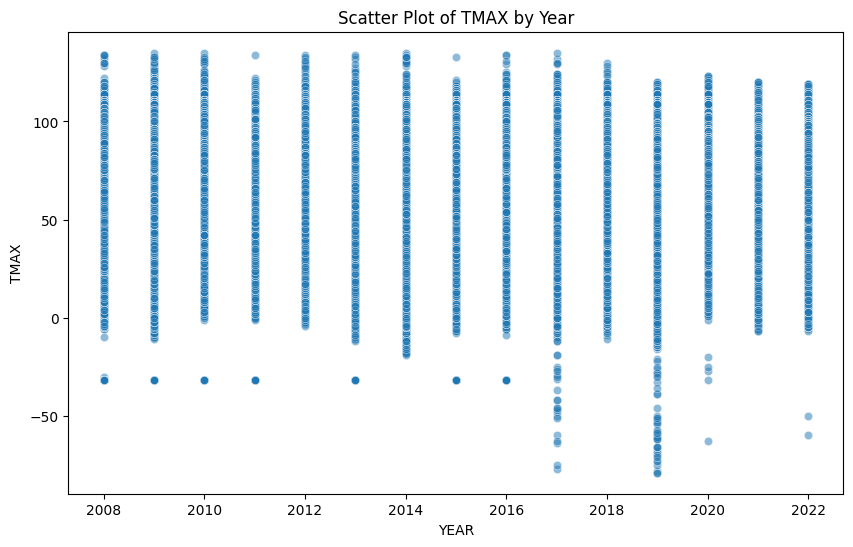

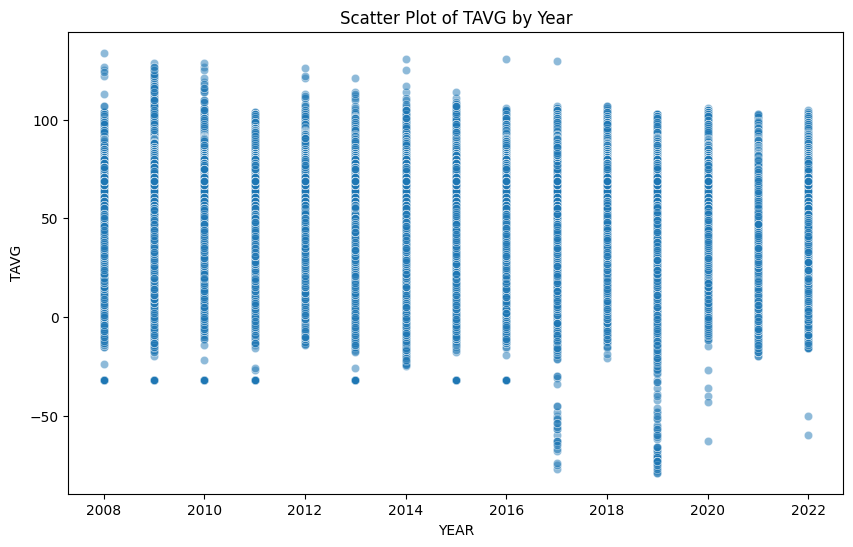

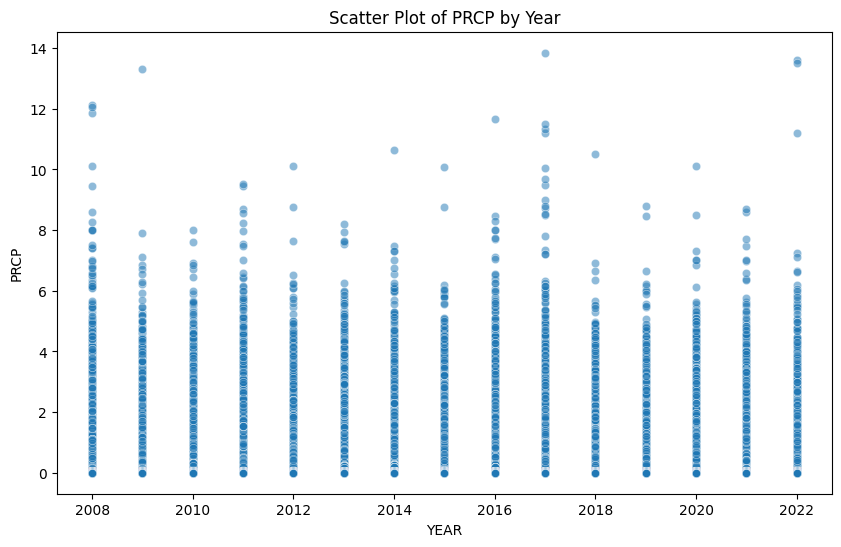

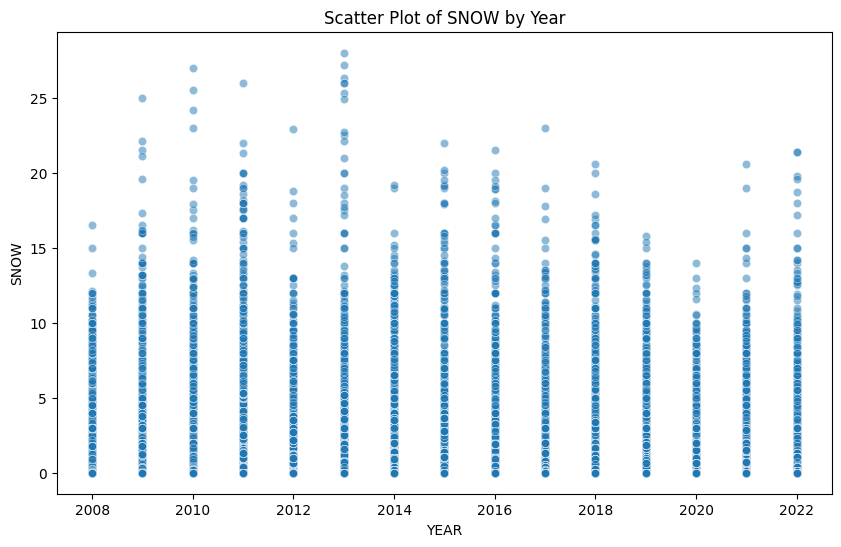

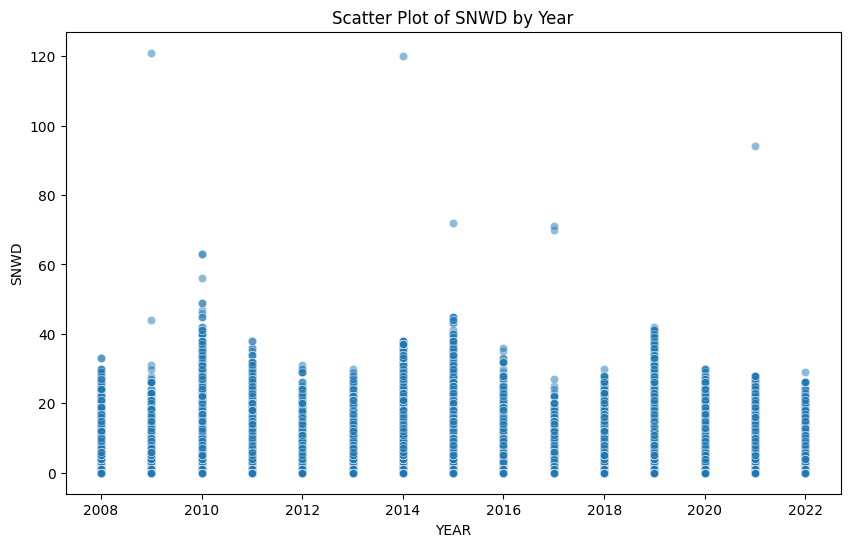

In [54]:
# Create a subset of the dataframe with selected variables
df_subset = df[['DATE'] + weather_variables]

# Convert the 'DATE' column to the year
df_subset['YEAR'] = df_subset['DATE'].dt.year

# Create bivariate scatter plots
for variable in weather_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='YEAR', y=variable, data=df_subset, alpha=0.5)
    plt.title(f'Scatter Plot of {variable} by Year')
    plt.show()


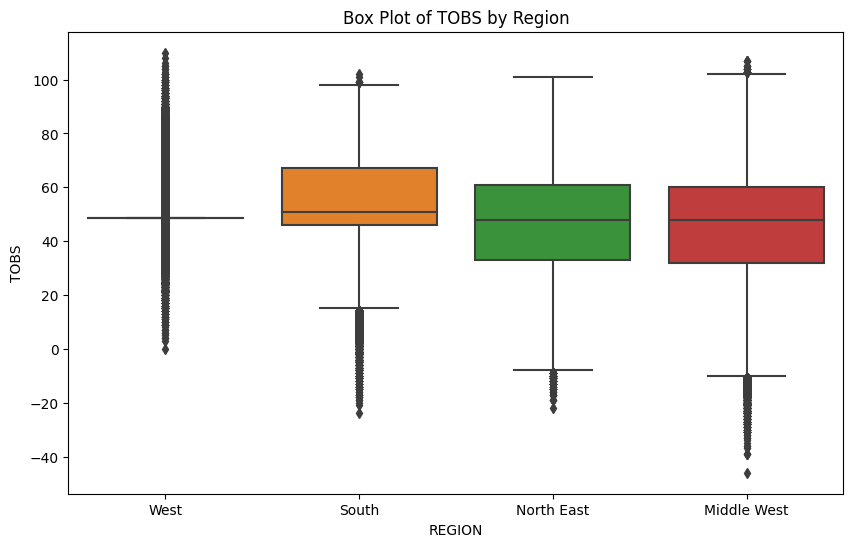

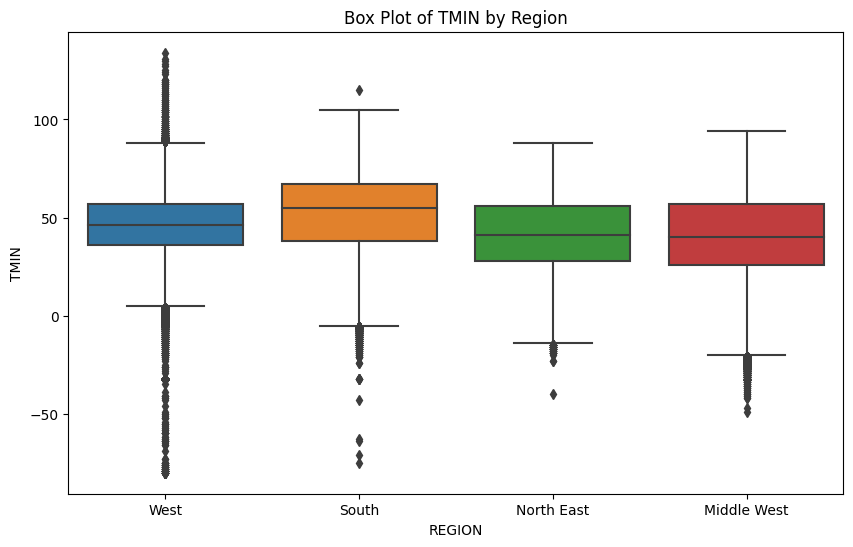

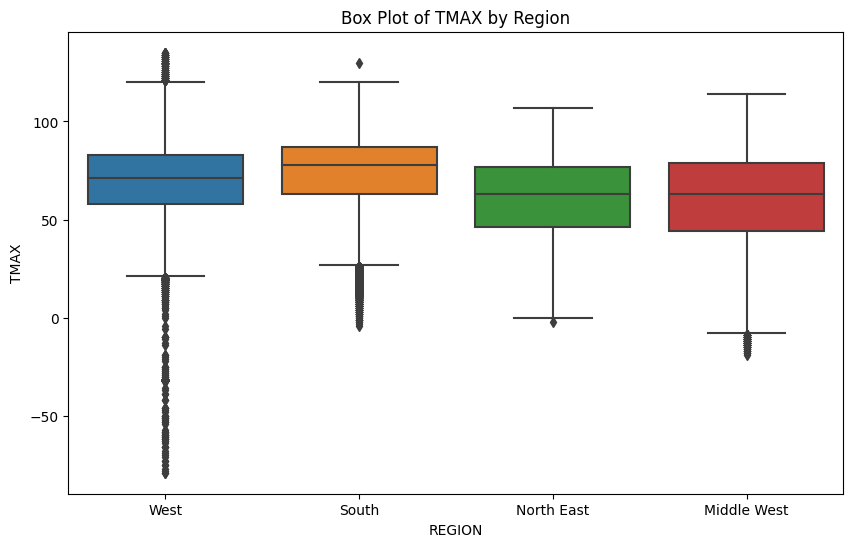

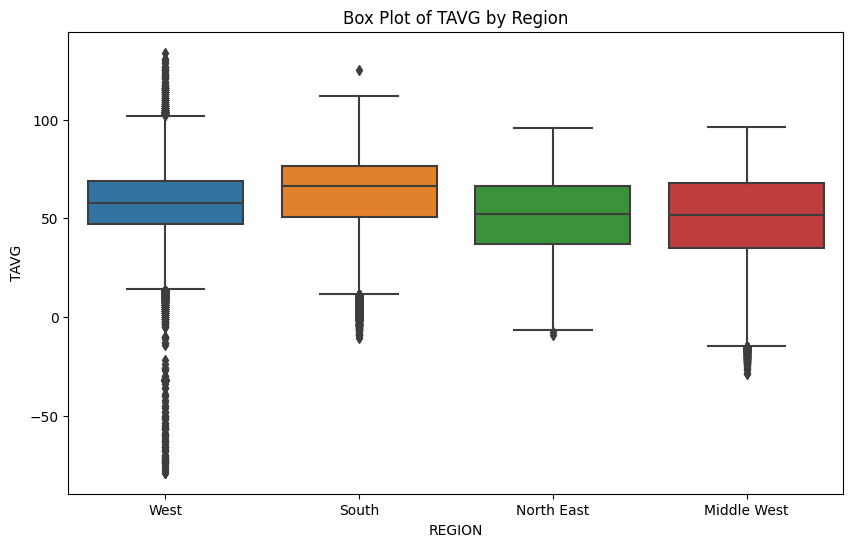

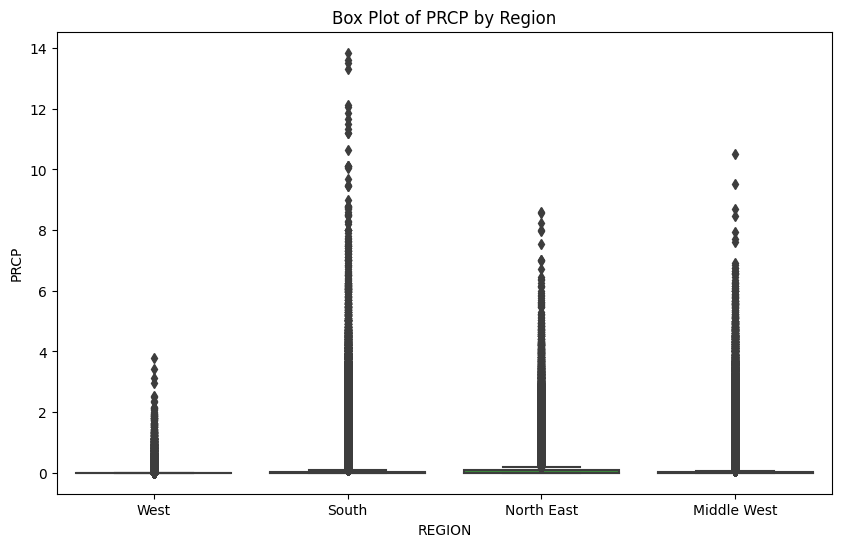

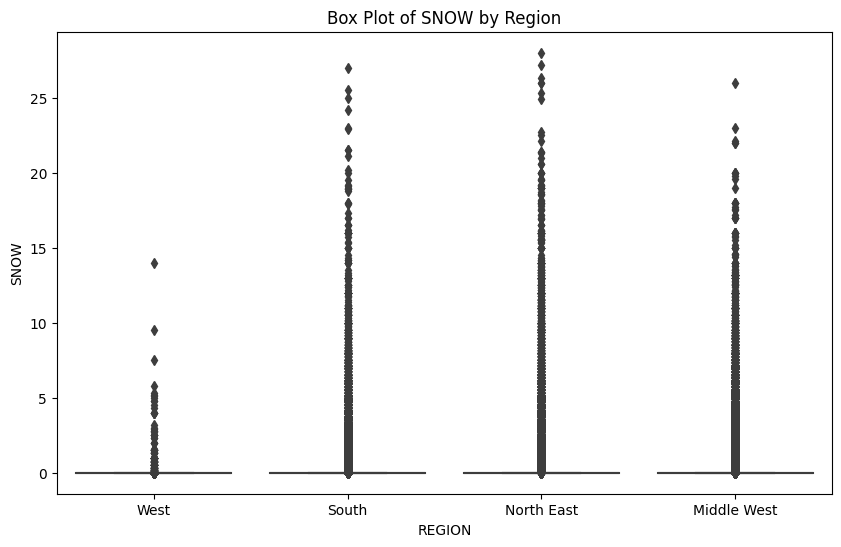

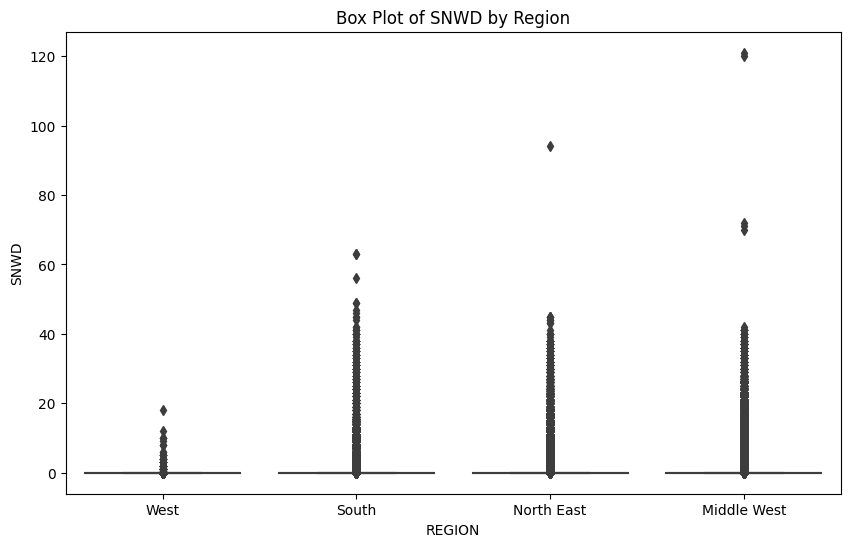

In [55]:
# Create a subset of the dataframe with selected variables
df_subset = df[['REGION'] + weather_variables]

# Create bivariate box plots by region
for variable in weather_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='REGION', y=variable, data=df_subset)
    plt.title(f'Box Plot of {variable} by Region')
    plt.show()
